# Importing Necessary Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv('hepatitis_csv.csv')
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [3]:
print(f'Observation : {df.shape[0]}\nFeatures : {df.shape[1]}')

Observation : 155
Features : 20


In [4]:
df.isna().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

### Script for R imputation
<h6 >Note : Installation of r-base and r-essentials in the base working environment is mandatory.

In [5]:
f = open('imputation.R','w+')
f.write('''
library(mice)
df <- read.csv('hepatitis_csv.csv',na.strings=c("na","NA"," ",""))
res <- mice(data=df,m=5,method="pmm",maxiter=5)
complete(res,1) -> result
write.csv(result,"hepatitis_csv_imputation.csv",row.names=FALSE)
''')
f.close()

subprocess.call("rscript imputation.R",shell=True)
print('Successfully imputed missing values in R using Predictive mean matching Techniques')

Successfully imputed missing values in R using Predictive mean matching Techniques


### Importing Imputed Data

In [6]:
df = pd.read_csv('hepatitis_csv_imputation.csv')

In [7]:
categorical_data=df.select_dtypes(include=["bool","object"])
numerical_data=df.select_dtypes(exclude=["bool","object"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          155 non-null    bool   
 3   antivirals       155 non-null    bool   
 4   fatigue          155 non-null    bool   
 5   malaise          155 non-null    bool   
 6   anorexia         155 non-null    bool   
 7   liver_big        155 non-null    bool   
 8   liver_firm       155 non-null    bool   
 9   spleen_palpable  155 non-null    bool   
 10  spiders          155 non-null    bool   
 11  ascites          155 non-null    bool   
 12  varices          155 non-null    bool   
 13  bilirubin        155 non-null    float64
 14  alk_phosphate    155 non-null    int64  
 15  sgot             155 non-null    int64  
 16  albumin          155 non-null    float64
 17  protime         

### Sex
 - Out of all patients, its observed that 89.67 % are female and only 10.322 % are male.
 - Its observed that men diagonised with hepatitis tend to survive more when compared with female patients.

In [9]:
df['sex'].value_counts(normalize=True)*100

female    89.677419
male      10.322581
Name: sex, dtype: float64

In [10]:
categorical_data.groupby(["sex"])["fatigue"].value_counts(normalize=True)*100

sex     fatigue
female  True       64.028777
        False      35.971223
male    True       75.000000
        False      25.000000
Name: fatigue, dtype: float64

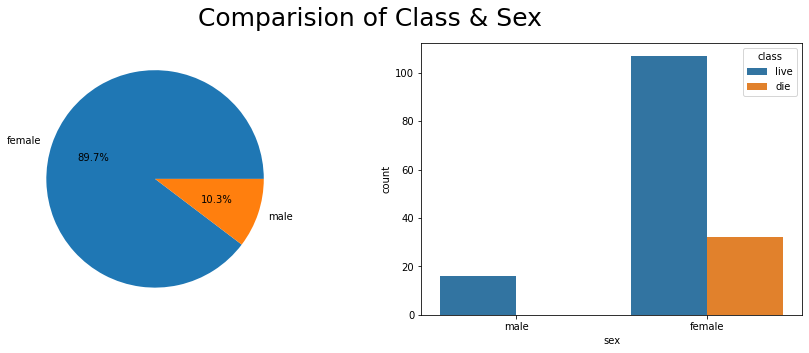

In [11]:
fig,ax = plt.subplots(1,2,figsize=[15,5])
temp = dict(df['sex'].value_counts())
ax[0].pie(temp.values(),labels=temp.keys(),autopct="%.1f%%");
sns.countplot(df['sex'],hue=df['class'],ax = ax[1]);
plt.suptitle('Comparision of Class & Sex',fontsize=25);

### Steroids

- Steroids may damage the liver and cause hepatitis directly.
- For instance, Many athletes use excessively high doses of steroids, which will increase the risk of suffering liver damage.
- Out of all patients, 50.967% consume steroids in one or another form and are prone to hepititis directly or indirectly.
- Its also observed that steroid intake and mortality rate of female is higher than that of male.

In [12]:
df['steroid'].value_counts(normalize=True)*100

True     50.967742
False    49.032258
Name: steroid, dtype: float64

In [13]:
categorical_data.groupby(["sex"])["steroid"].value_counts(normalize=True)*100

sex     steroid
female  True       51.798561
        False      48.201439
male    False      56.250000
        True       43.750000
Name: steroid, dtype: float64

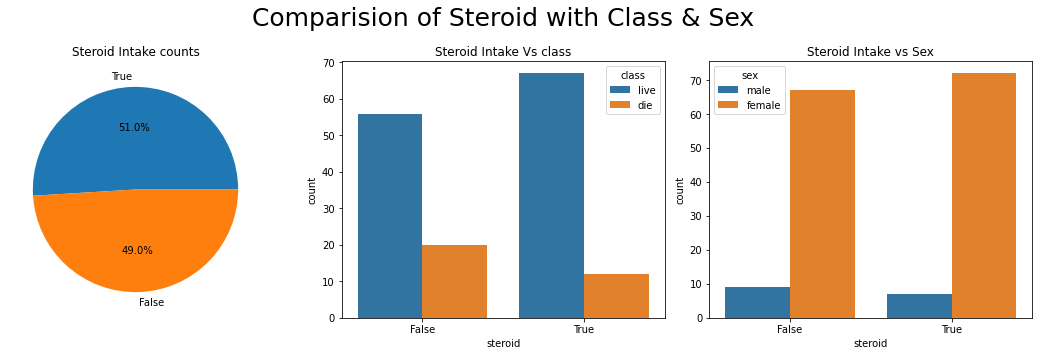

In [14]:
fig,ax = plt.subplots(1,3,figsize=[15,5])
temp = dict(df['steroid'].value_counts())
ax[0].pie(temp.values(),labels=temp.keys(),autopct="%.1f%%");
sns.countplot(df['steroid'],hue=df['class'],ax = ax[1]);
sns.countplot(df['steroid'],hue=df['sex'],ax = ax[2]);
ax[0].set_title('Steroid Intake counts')
ax[1].set_title('Steroid Intake Vs class')
ax[2].set_title('Steroid Intake vs Sex')
plt.suptitle('Comparision of Steroid with Class & Sex',fontsize=25)
plt.tight_layout();

### Antivirals
- Its observed that 84.51 % of patients were not on antiviral medications.
- Antiviral medication intake is quite high in females than males.

In [15]:
df['antivirals'].value_counts(normalize=True)*100

False    84.516129
True     15.483871
Name: antivirals, dtype: float64

In [16]:
categorical_data.groupby(["sex"])["antivirals"].value_counts(normalize=True)*100

sex     antivirals
female  False         85.611511
        True          14.388489
male    False         75.000000
        True          25.000000
Name: antivirals, dtype: float64

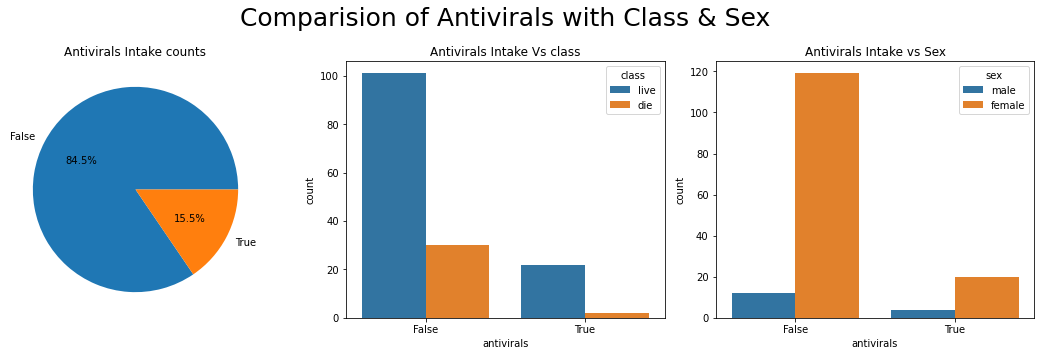

In [17]:
fig,ax = plt.subplots(1,3,figsize=[15,5])
temp = dict(df['antivirals'].value_counts())
ax[0].pie(temp.values(),labels=temp.keys(),autopct="%.1f%%");
sns.countplot(df['antivirals'],hue=df['class'],ax = ax[1]);
sns.countplot(df['antivirals'],hue=df['sex'],ax = ax[2]);
ax[0].set_title('Antivirals Intake counts')
ax[1].set_title('Antivirals Intake Vs class')
ax[2].set_title('Antivirals Intake vs Sex')
plt.suptitle('Comparision of Antivirals with Class & Sex',fontsize=25)
plt.tight_layout();

### Fatigue
- Its Observed that out of all patients, 65.16 % experience fatigue.
- Based on observation, we conclude female experience more fatigue when compared with male.
- Patients experiencing fatigue are most likely to survive. It may be side-effects due to some medications.

In [18]:
df['fatigue'].value_counts(normalize=True)*100

True     65.16129
False    34.83871
Name: fatigue, dtype: float64

In [19]:
categorical_data.groupby(["sex"])["fatigue"].value_counts(normalize=True)*100

sex     fatigue
female  True       64.028777
        False      35.971223
male    True       75.000000
        False      25.000000
Name: fatigue, dtype: float64

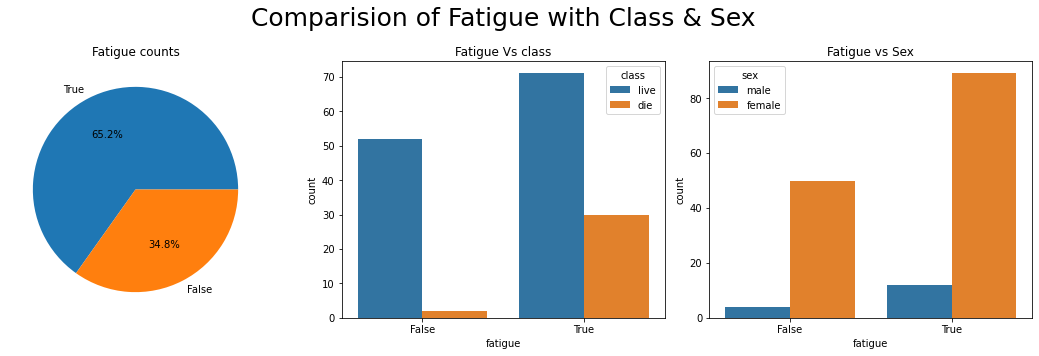

In [20]:
fig,ax = plt.subplots(1,3,figsize=[15,5])
temp = dict(df['fatigue'].value_counts())
ax[0].pie(temp.values(),labels=temp.keys(),autopct="%.1f%%");
sns.countplot(df['fatigue'],hue=df['class'],ax = ax[1]);
sns.countplot(df['fatigue'],hue=df['sex'],ax = ax[2]);
ax[0].set_title('Fatigue counts')
ax[1].set_title('Fatigue Vs class')
ax[2].set_title('Fatigue vs Sex')
plt.suptitle('Comparision of Fatigue with Class & Sex',fontsize=25)
plt.tight_layout();

### Malaise
- A general sense of being unwell, often accompanied by fatigue, diffuse pain or lack of interest in activities.
- Its observed that 60.64 % of patients experience malaise.
- Fatigue may cause Malaise, but vice versa is not always True.
- Since female experience more fatigue, they are most likely to become malaise than male.

In [21]:
df['malaise'].value_counts(normalize=True)*100

False    60.0
True     40.0
Name: malaise, dtype: float64

In [22]:
categorical_data.groupby(["sex"])["malaise"].value_counts(normalize=True)*100

sex     malaise
female  False      60.431655
        True       39.568345
male    False      56.250000
        True       43.750000
Name: malaise, dtype: float64

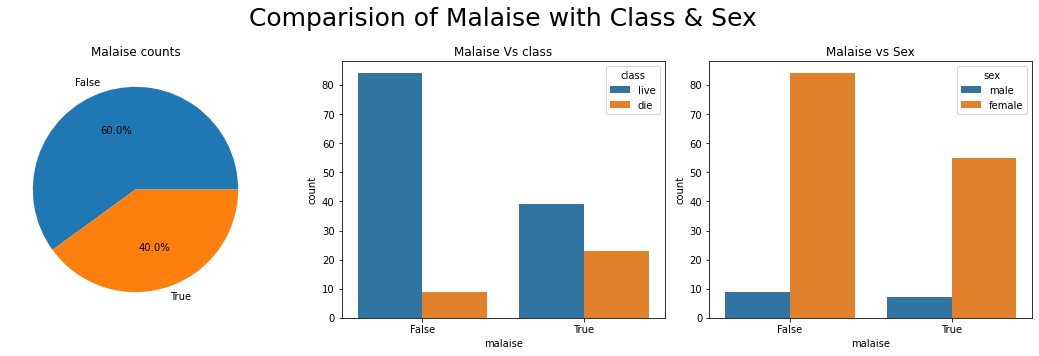

In [23]:
fig,ax = plt.subplots(1,3,figsize=[15,5])
temp = dict(df['malaise'].value_counts())
ax[0].pie(temp.values(),labels=temp.keys(),autopct="%.1f%%");
sns.countplot(df['malaise'],hue=df['class'],ax = ax[1]);
sns.countplot(df['malaise'],hue=df['sex'],ax = ax[2]);
ax[0].set_title('Malaise counts')
ax[1].set_title('Malaise Vs class')
ax[2].set_title('Malaise vs Sex')
plt.suptitle('Comparision of Malaise with Class & Sex',fontsize=25)
plt.tight_layout();

### Anorexia
- Anorexia is characterised by a distorted body image, with an unwarranted fear of being overweight.
- Symptoms include trying to maintain a below-normal weight through starvation or too much exercise.
- Its eating disorder causing people to obsess about weight and what they eat.
- Based on observation, we conclude that anorexia is more seen in female which causes increased mortality rate amoung female when compared with males.

In [24]:
df['anorexia'].value_counts(normalize=True)*100

False    79.354839
True     20.645161
Name: anorexia, dtype: float64

In [25]:
categorical_data.groupby(["sex"])["anorexia"].value_counts(normalize=True)*100

sex     anorexia
female  False       79.136691
        True        20.863309
male    False       81.250000
        True        18.750000
Name: anorexia, dtype: float64

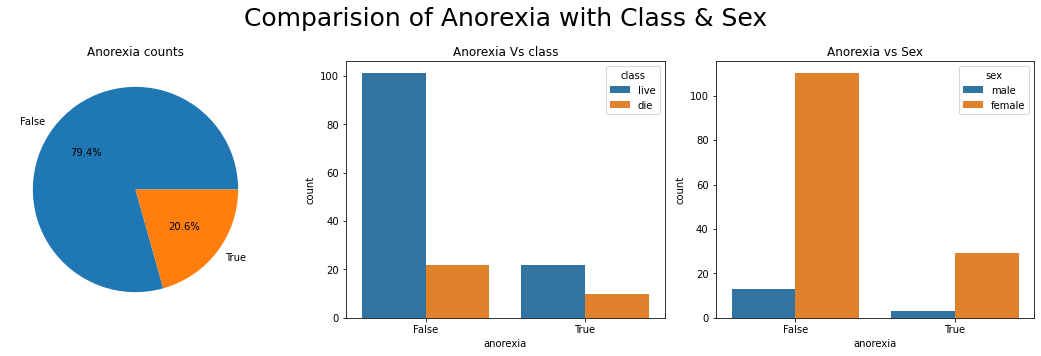

In [26]:
fig,ax = plt.subplots(1,3,figsize=[15,5])
temp = dict(df['anorexia'].value_counts())
ax[0].pie(temp.values(),labels=temp.keys(),autopct="%.1f%%");
sns.countplot(df['anorexia'],hue=df['class'],ax = ax[1]);
sns.countplot(df['anorexia'],hue=df['sex'],ax = ax[2]);
ax[0].set_title('Anorexia counts')
ax[1].set_title('Anorexia Vs class')
ax[2].set_title('Anorexia vs Sex')
plt.suptitle('Comparision of Anorexia with Class & Sex',fontsize=25)
plt.tight_layout();

### liver_big
- An enlarged liver can have many possible causes. An enlarged liver is one that's bigger than normal. The medical term is hepatomegaly. Rather than a disease, an enlarged liver is a sign of an underlying problem, such as liver disease, congestive heart failure or cancer.
- Out of all patients diagonised with hepatitis, 81.93 % of patients show enlarged liver size. 

In [27]:
df['liver_big'].value_counts(normalize=True)*100

True     81.935484
False    18.064516
Name: liver_big, dtype: float64

In [28]:
categorical_data.groupby(["sex"])["liver_big"].value_counts(normalize=True)*100

sex     liver_big
female  True         82.733813
        False        17.266187
male    True         75.000000
        False        25.000000
Name: liver_big, dtype: float64

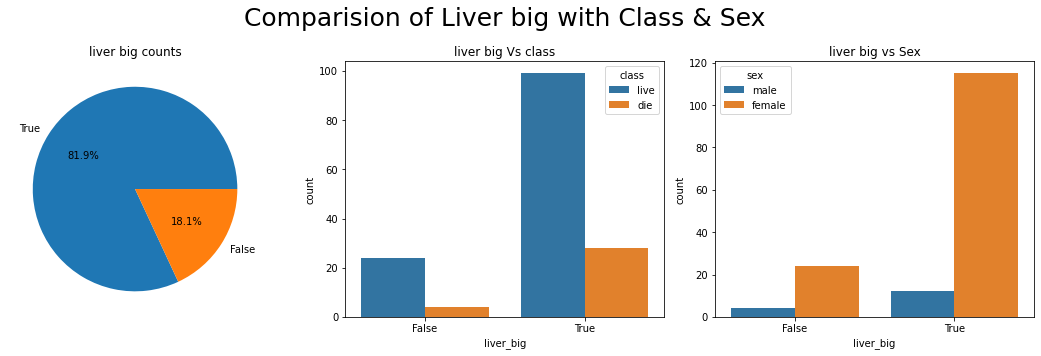

In [29]:
fig,ax = plt.subplots(1,3,figsize=[15,5])
temp = dict(df['liver_big'].value_counts())
ax[0].pie(temp.values(),labels=temp.keys(),autopct="%.1f%%");
sns.countplot(df['liver_big'],hue=df['class'],ax = ax[1]);
sns.countplot(df['liver_big'],hue=df['sex'],ax = ax[2]);
ax[0].set_title('liver big counts')
ax[1].set_title('liver big Vs class')
ax[2].set_title('liver big vs Sex')
plt.suptitle('Comparision of Liver big with Class & Sex',fontsize=25)
plt.tight_layout();

### liver_firm
- Out of all patients diagonised with hepatitis, 58.06 % of patients show enlarged liver size along with unsual structure. 

In [30]:
df['liver_firm'].value_counts(normalize=True)*100

False    58.064516
True     41.935484
Name: liver_firm, dtype: float64

In [31]:
categorical_data.groupby(["sex"])["liver_firm"].value_counts(normalize=True)*100

sex     liver_firm
female  False         58.992806
        True          41.007194
male    False         50.000000
        True          50.000000
Name: liver_firm, dtype: float64

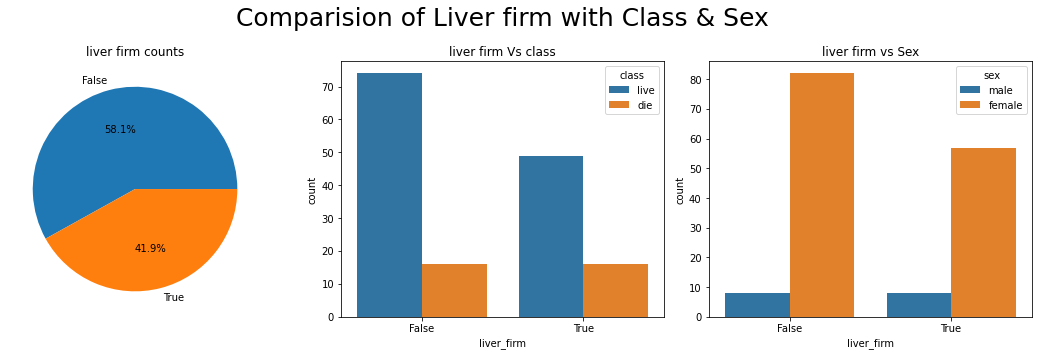

In [32]:
fig,ax = plt.subplots(1,3,figsize=[15,5])
temp = dict(df['liver_firm'].value_counts())
ax[0].pie(temp.values(),labels=temp.keys(),autopct="%.1f%%");
sns.countplot(df['liver_firm'],hue=df['class'],ax = ax[1]);
sns.countplot(df['liver_firm'],hue=df['sex'],ax = ax[2]);
ax[0].set_title('liver firm counts')
ax[1].set_title('liver firm Vs class')
ax[2].set_title('liver firm vs Sex')
plt.suptitle('Comparision of Liver firm with Class & Sex',fontsize=25)
plt.tight_layout();

### spleen_palpable
- The normal adult spleen lies immediately under the diaphragm in the left upper quadrant of the abdomen. It ranges in length from 6 to 13 cm and in weight from 75 to 120 g. The spleen is not normally palpable except in slender young adults.
- An enlarged spleen shows :
> - feeling full very quickly after eating (an enlarged spleen can press on the stomach)
> - feeling discomfort or pain behind left ribs.
> - anaemia and fatigue.
> - frequent infections.
> - easy bleeding.
- Based on observation, we conclude that 80 % of patients are free from spleen issues.

In [33]:
df['spleen_palpable'].value_counts(normalize=True)*100

False    80.0
True     20.0
Name: spleen_palpable, dtype: float64

In [34]:
categorical_data.groupby(["sex"])["spleen_palpable"].value_counts(normalize=True)*100

sex     spleen_palpable
female  False              81.294964
        True               18.705036
male    False              68.750000
        True               31.250000
Name: spleen_palpable, dtype: float64

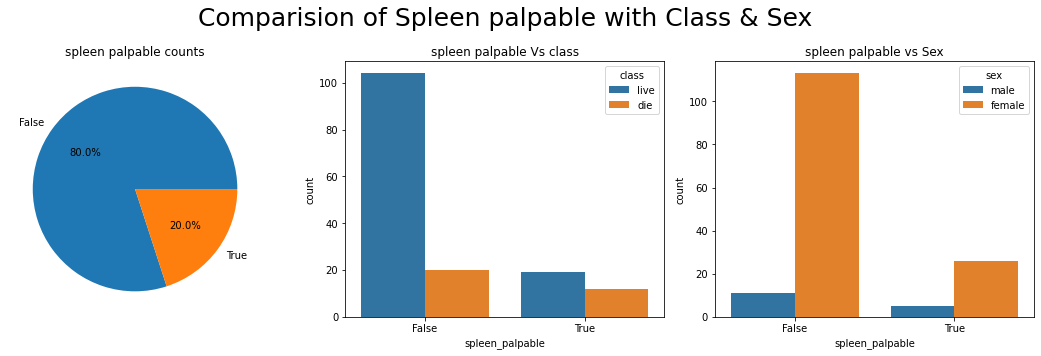

In [35]:
fig,ax = plt.subplots(1,3,figsize=[15,5])
temp = dict(df['spleen_palpable'].value_counts())
ax[0].pie(temp.values(),labels=temp.keys(),autopct="%.1f%%");
sns.countplot(df['spleen_palpable'],hue=df['class'],ax = ax[1]);
sns.countplot(df['spleen_palpable'],hue=df['sex'],ax = ax[2]);
ax[0].set_title('spleen palpable counts')
ax[1].set_title('spleen palpable Vs class')
ax[2].set_title('spleen palpable vs Sex')
plt.suptitle('Comparision of Spleen palpable with Class & Sex',fontsize=25)
plt.tight_layout();

### spiders

In [36]:
df['spiders'].value_counts()

False    100
True      55
Name: spiders, dtype: int64

In [37]:
categorical_data.groupby(["sex"])["spiders"].value_counts(normalize=True)*100

sex     spiders
female  False      65.467626
        True       34.532374
male    False      56.250000
        True       43.750000
Name: spiders, dtype: float64

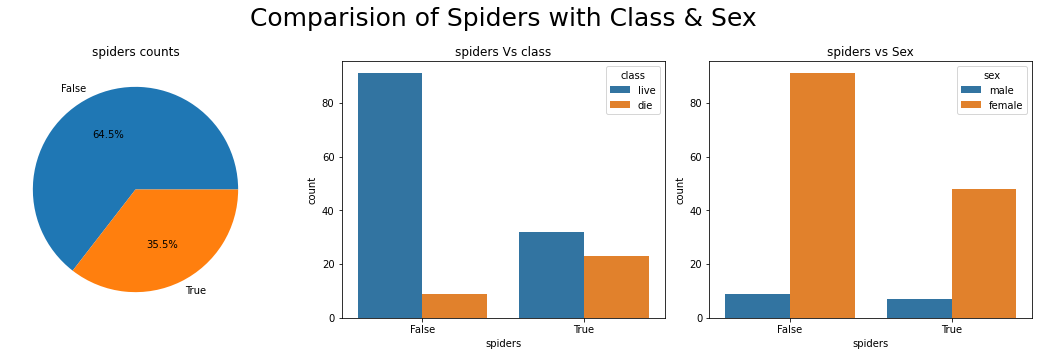

In [38]:
fig,ax = plt.subplots(1,3,figsize=[15,5])
temp = dict(df['spiders'].value_counts())
ax[0].pie(temp.values(),labels=temp.keys(),autopct="%.1f%%");
sns.countplot(df['spiders'],hue=df['class'],ax = ax[1]);
sns.countplot(df['spiders'],hue=df['sex'],ax = ax[2]);
ax[0].set_title('spiders counts')
ax[1].set_title('spiders Vs class')
ax[2].set_title('spiders vs Sex')
plt.suptitle('Comparision of Spiders with Class & Sex',fontsize=25)
plt.tight_layout();

### ascites
- Fluid that accumulates in the abdomen might become infected and require treatment with antibiotics.
- Out of all patients, 12.90 % of female patient experience ascites.

In [39]:
df['ascites'].value_counts(normalize=True)*100

False    87.096774
True     12.903226
Name: ascites, dtype: float64

In [40]:
categorical_data.groupby(["sex"])["ascites"].value_counts(normalize=True)*100

sex     ascites
female  False       85.611511
        True        14.388489
male    False      100.000000
Name: ascites, dtype: float64

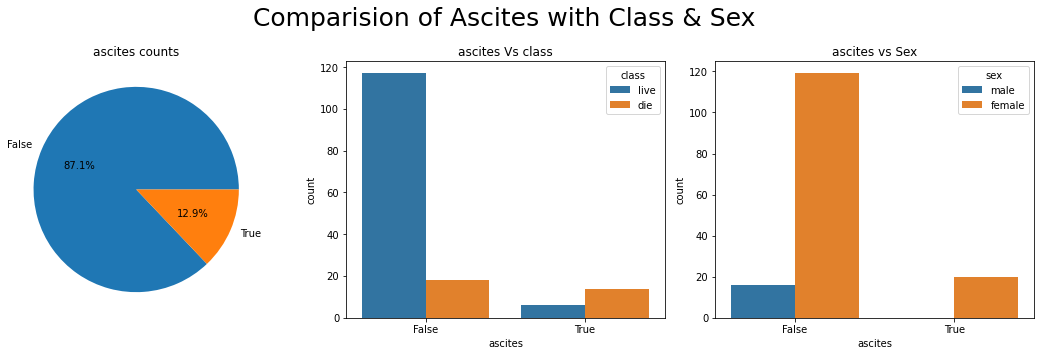

In [41]:
fig,ax = plt.subplots(1,3,figsize=[15,5])
temp = dict(df['ascites'].value_counts())
ax[0].pie(temp.values(),labels=temp.keys(),autopct="%.1f%%");
sns.countplot(df['ascites'],hue=df['class'],ax = ax[1]);
sns.countplot(df['ascites'],hue=df['sex'],ax = ax[2]);
ax[0].set_title('ascites counts')
ax[1].set_title('ascites Vs class')
ax[2].set_title('ascites vs Sex')
plt.suptitle('Comparision of Ascites with Class & Sex',fontsize=25)
plt.tight_layout();

### varices
- It is an abnormally dilated vessel with a tortuous course. Varices usually occur in the venous system, but may also occur in arterial or lymphatic vessels.
- varices is mostly seen in female patients covering over 12.2580 % 

In [42]:
df['varices'].value_counts(normalize=True)*100

False    87.741935
True     12.258065
Name: varices, dtype: float64

In [43]:
categorical_data.groupby(["sex"])["varices"].value_counts(normalize=True)*100

sex     varices
female  False      87.769784
        True       12.230216
male    False      87.500000
        True       12.500000
Name: varices, dtype: float64

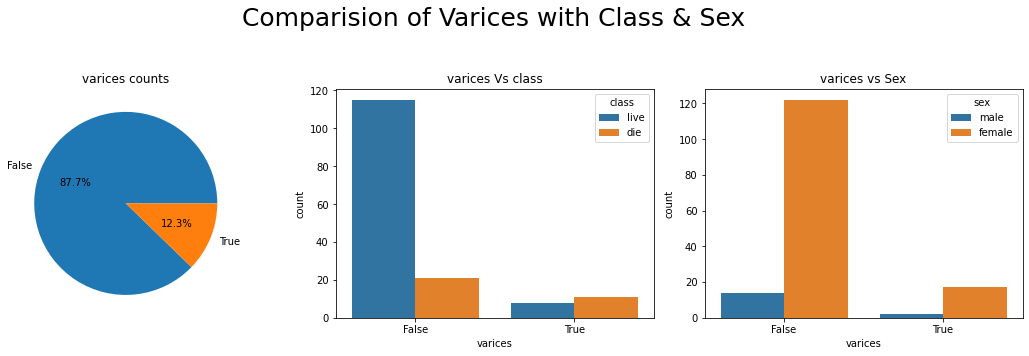

In [44]:
fig,ax = plt.subplots(1,3,figsize=[15,5])
temp = dict(df['varices'].value_counts())
ax[0].pie(temp.values(),labels=temp.keys(),autopct="%.1f%%");
sns.countplot(df['varices'],hue=df['class'],ax = ax[1]);
sns.countplot(df['varices'],hue=df['sex'],ax = ax[2]);
ax[0].set_title('varices counts')
ax[1].set_title('varices Vs class')
ax[2].set_title('varices vs Sex')
plt.suptitle('Comparision of Varices with Class & Sex\n',fontsize=25)
plt.tight_layout();

### Histology
- Histology is used to diagnose diseases in humans, animals, and plants and to analyze the effects of treatment. Histology is used during autopsies and forensic investigations to help understand unexplained deaths.

In [45]:
df['histology'].value_counts(normalize=True)*100

False    54.83871
True     45.16129
Name: histology, dtype: float64

In [46]:
categorical_data.groupby(["sex"])["histology"].value_counts(normalize=True)*100

sex     histology
female  False        52.517986
        True         47.482014
male    False        75.000000
        True         25.000000
Name: histology, dtype: float64

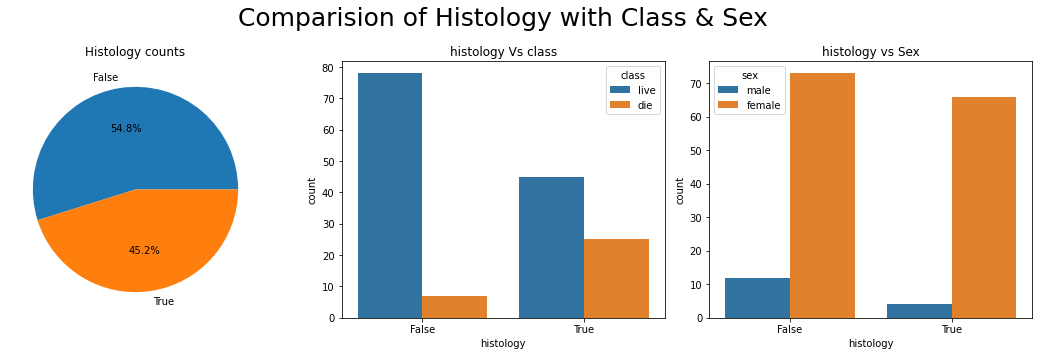

In [47]:
fig,ax = plt.subplots(1,3,figsize=[15,5])
temp = dict(df['histology'].value_counts())
ax[0].pie(temp.values(),labels=temp.keys(),autopct="%.1f%%");
sns.countplot(df['histology'],hue=df['class'],ax = ax[1]);
sns.countplot(df['histology'],hue=df['sex'],ax = ax[2]);
ax[0].set_title('Histology counts')
ax[1].set_title('histology Vs class')
ax[2].set_title('histology vs Sex')
plt.suptitle('Comparision of Histology with Class & Sex',fontsize=25)
plt.tight_layout();

### Class

In [48]:
df['class'].value_counts(normalize=True)*100

live    79.354839
die     20.645161
Name: class, dtype: float64

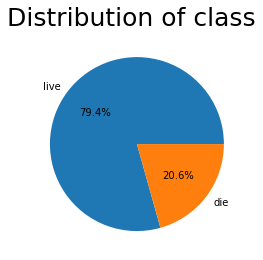

In [49]:
temp = dict(df['class'].value_counts())
plt.pie(temp.values(),labels=temp.keys(),autopct="%.1f%%");
plt.suptitle('Distribution of class',fontsize=25);

In [50]:
categorical_data.groupby(["sex"])["class"].value_counts(normalize=True)*100

sex     class
female  live      76.978417
        die       23.021583
male    live     100.000000
Name: class, dtype: float64

### Protime
The average time range for blood to clot is about 10.0 to 12.5 seconds. A number higher than that range means it takes blood longer than usual to clot. A number lower than that range means blood clots more quickly than normal.

In [51]:
dict(df['protime'].agg(['mean','median','std','var','kurt']))

{'mean': 59.16774193548387,
 'median': 60.0,
 'std': 24.248662931364777,
 'var': 587.9976539589443,
 'kurt': -0.13062255704143055}

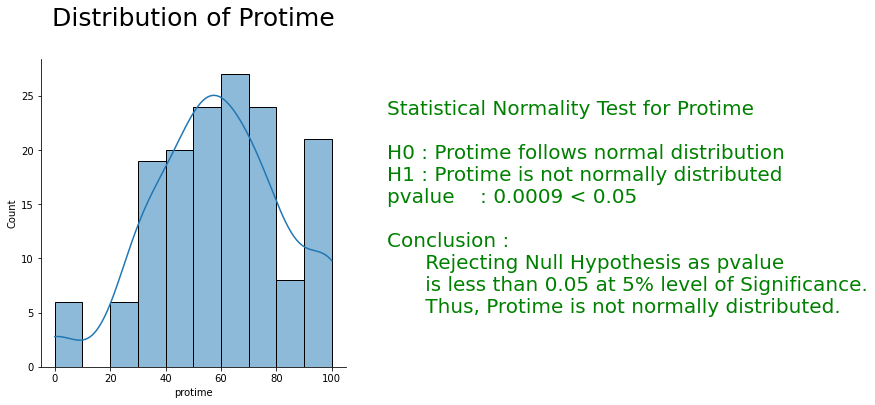

In [52]:
sns.displot(df['protime'],kde=True);
statistic,pvalue = shapiro(df['protime'])
temp = f'''Statistical Normality Test for Protime\n
H0 : Protime follows normal distribution
H1 : Protime is not normally distributed
pvalue    : {round(pvalue,4)} < 0.05\n
Conclusion :\n      Rejecting Null Hypothesis as pvalue
      is less than 0.05 at 5% level of Significance.
      Thus, Protime is not normally distributed.'''
plt.text(120,5,temp,fontsize=20,color='green');
plt.title('Distribution of Protime\n',fontsize=25);

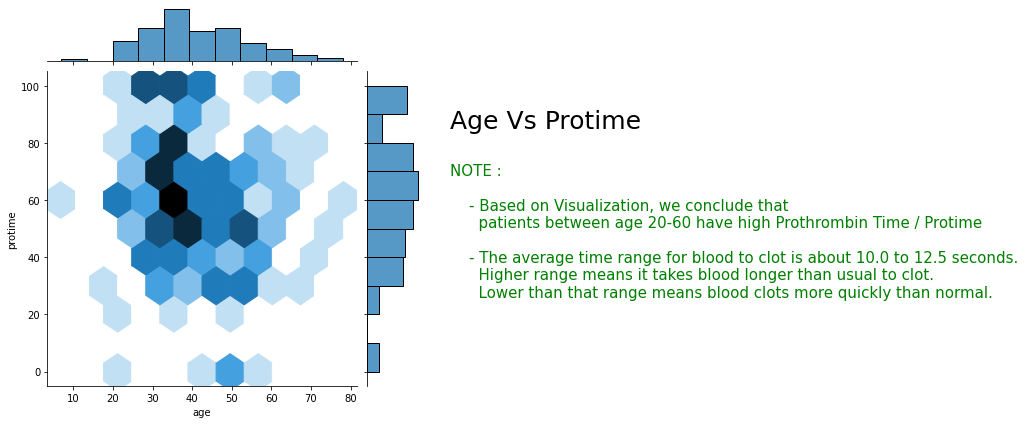

In [53]:
sns.jointplot(x="age", y="protime", data=df,kind='hex');
temp = '''
NOTE : 

    - Based on Visualization, we conclude that
      patients between age 20-60 have high Prothrombin Time / Protime
    
    - The average time range for blood to clot is about 10.0 to 12.5 seconds.
      Higher range means it takes blood longer than usual to clot.
      Lower than that range means blood clots more quickly than normal.
'''
plt.text(105,20,temp,fontsize=15,color='green');
plt.text(105,85,'Age Vs Protime',fontsize=25);

### Age

In [54]:
dict(df['age'].agg(['mean','median','std','var','kurt']))

{'mean': 41.2,
 'median': 39.0,
 'std': 12.565878349773195,
 'var': 157.9012987012987,
 'kurt': -0.10627063006847859}

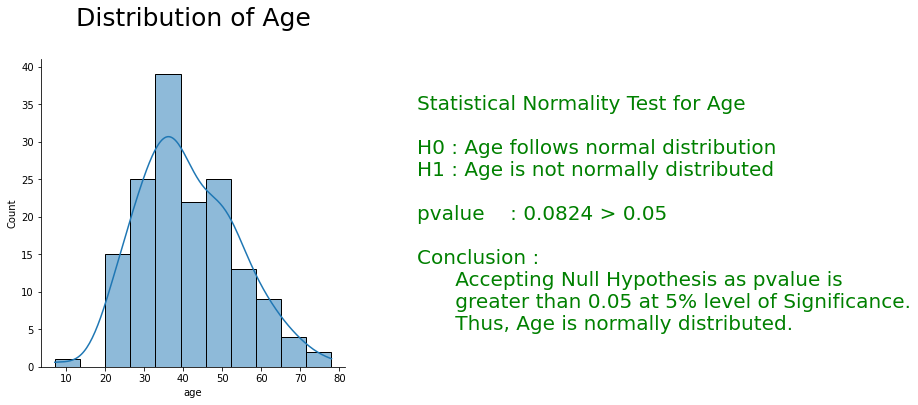

In [55]:
sns.displot(df['age'],kde=True);
statistic,pvalue = shapiro(df['age'])
temp = f'''Statistical Normality Test for Age

H0 : Age follows normal distribution
H1 : Age is not normally distributed\n
pvalue    : {round(pvalue,4)} > 0.05\n
Conclusion : \n      Accepting Null Hypothesis as pvalue is
      greater than 0.05 at 5% level of Significance.
      Thus, Age is normally distributed.'''
plt.text(100,5,temp,fontsize=20,color='green');
plt.title('Distribution of Age\n',fontsize=25);

### Bilirubin
 - bilirubin has been shown to possess important functions as an antioxidant, but it also serves simply as a means to excrete unwanted heme, derived from various heme-containing proteins such as hemoglobin, myoglobin, and various P450 enzymes.
 - Elevated levels may indicate liver damage or disease. Higher than normal levels of direct bilirubin in your blood may indicate your liver isn't clearing bilirubin properly. Elevated levels of indirect bilirubin may indicate other problems.
 - Hepatitis happens when your liver gets inflamed, often due to a viral infection. When it's inflamed, your liver can't easily process bilirubin, leading to a buildup of it in your blood.

In [56]:
dict(df['bilirubin'].agg(['mean','median','std','var','kurt']))

{'mean': 1.4322580645161282,
 'median': 1.0,
 'std': 1.212646321810867,
 'var': 1.4705111018014245,
 'kurt': 9.821995209828401}

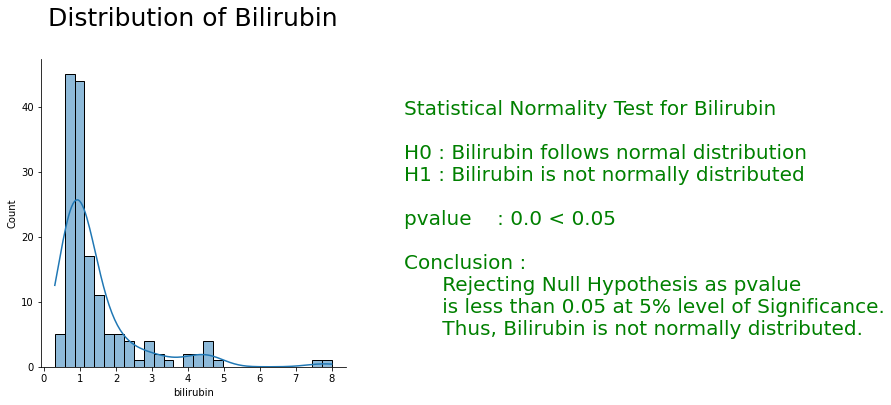

In [57]:
sns.displot(df['bilirubin'],kde=True);
statistic,pvalue = shapiro(df['bilirubin'])
temp = f'''Statistical Normality Test for Bilirubin\n
H0 : Bilirubin follows normal distribution
H1 : Bilirubin is not normally distributed\n
pvalue    : {round(pvalue,4)} < 0.05\n
Conclusion : \n      Rejecting Null Hypothesis as pvalue
      is less than 0.05 at 5% level of Significance.
      Thus, Bilirubin is not normally distributed.'''
plt.text(10,5,temp,fontsize=20,color='green');
plt.title('Distribution of Bilirubin\n',fontsize=25);

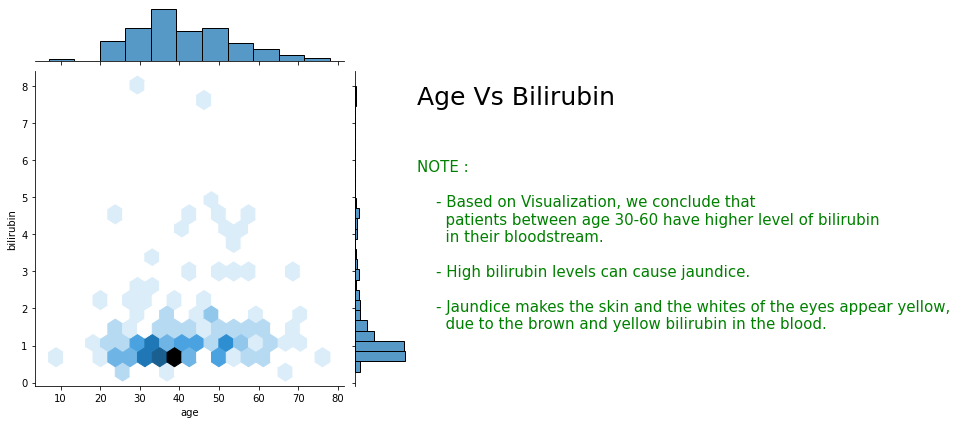

In [58]:
sns.jointplot(x="age", y="bilirubin", data=df,kind='hex');
temp = '''
NOTE : 

    - Based on Visualization, we conclude that
      patients between age 30-60 have higher level of bilirubin
      in their bloodstream.
    
    - High bilirubin levels can cause jaundice. 
    
    - Jaundice makes the skin and the whites of the eyes appear yellow,
      due to the brown and yellow bilirubin in the blood.
'''
plt.text(100,1,temp,fontsize=15,color='green');
plt.text(100,7.5,'Age Vs Bilirubin',fontsize=25);

### Albumin
 - Albumin is a protein made by your liver. Albumin helps keep fluid in your bloodstream so it doesn't leak into other tissues. It is also carries various substances throughout your body, including hormones, vitamins, and enzymes. Low albumin levels can indicate a problem with your liver or kidneys.
 - Synthesis of albumin takes place in the liver, after which it is excreted into the bloodstream. Albumin can be found in the bloodstream, interstitial space, as well as other fluids. When found in other fluids in large concentrations, such as in ascites or urine, it is often an indication of underlying pathology.

In [59]:
dict(df['albumin'].agg(['mean','median','std','var','kurt']))

{'mean': 3.7890322580645157,
 'median': 4.0,
 'std': 0.655106588128835,
 'var': 0.42916464180980307,
 'kurt': 1.081474427294936}

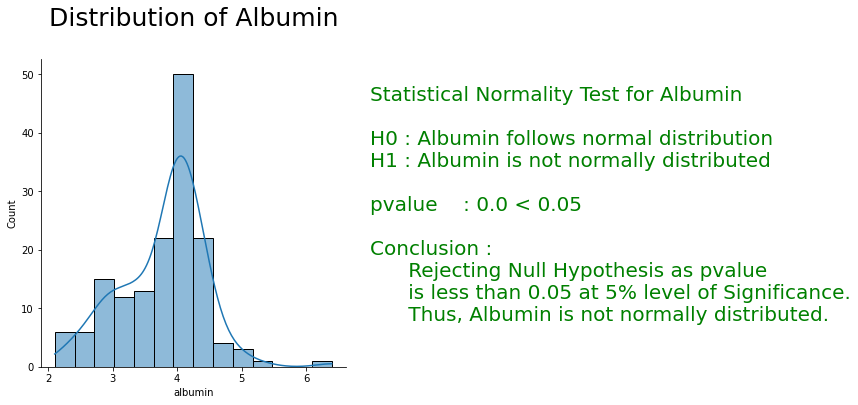

In [60]:
sns.displot(df['albumin'],kde=True);
statistic,pvalue = shapiro(df['albumin'])
temp = f'''Statistical Normality Test for Albumin\n
H0 : Albumin follows normal distribution
H1 : Albumin is not normally distributed\n
pvalue    : {round(pvalue,4)} < 0.05\n
Conclusion :\n      Rejecting Null Hypothesis as pvalue 
      is less than 0.05 at 5% level of Significance.
      Thus, Albumin is not normally distributed.'''
plt.text(7,8,temp,fontsize=20,color='green');
plt.title('Distribution of Albumin\n',fontsize=25);

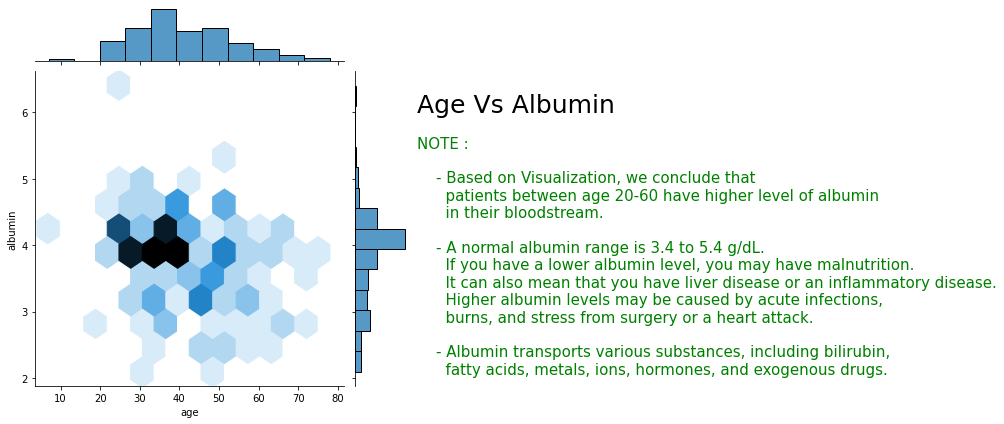

In [61]:
sns.jointplot(x="age", y="albumin", data=df,kind='hex');
temp = '''
NOTE : 

    - Based on Visualization, we conclude that
      patients between age 20-60 have higher level of albumin
      in their bloodstream.
    
    - A normal albumin range is 3.4 to 5.4 g/dL.
      If you have a lower albumin level, you may have malnutrition.
      It can also mean that you have liver disease or an inflammatory disease.
      Higher albumin levels may be caused by acute infections,
      burns, and stress from surgery or a heart attack. 
    
    - Albumin transports various substances, including bilirubin, 
      fatty acids, metals, ions, hormones, and exogenous drugs.
'''
plt.text(100,1.8,temp,fontsize=15,color='green');
plt.text(100,6,'Age Vs Albumin',fontsize=25);

### alk_phosphate
 - The ALP level in healthy adults should be 20–140 units per liter (U/L). Children tend to have significantly higher levels of ALP than adults because their bones are still growing. A person recovering from a bone injury may also have a raised ALP level in the 3 months after the injury while their bone heals.
 - High ALP usually means that either the liver has been damaged or a condition causing increased bone cell activity is present. If other liver tests such as bilirubin, aspartate aminotransferase (AST), or alanine aminotransferase (ALT) are also high, usually the increased ALP is caused by liver damage or disease.

In [62]:
dict(df['alk_phosphate'].agg(['mean','median','std','var','kurt']))

{'mean': 106.90322580645162,
 'median': 85.0,
 'std': 53.29186656024214,
 'var': 2840.0230414746543,
 'kurt': 2.349713007069393}

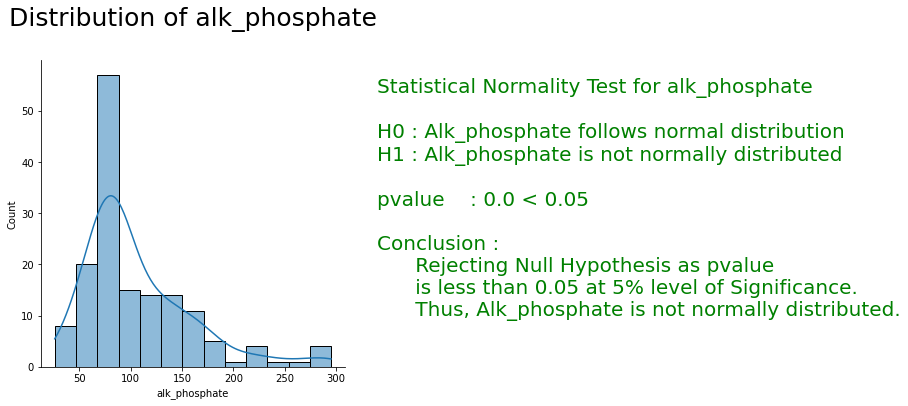

In [63]:
sns.displot(df['alk_phosphate'],kde=True);
statistic,pvalue = shapiro(df['alk_phosphate'])
temp = f'''Statistical Normality Test for alk_phosphate\n
H0 : Alk_phosphate follows normal distribution
H1 : Alk_phosphate is not normally distributed\n
pvalue    : {round(pvalue,4)} < 0.05\n
Conclusion :\n      Rejecting Null Hypothesis as pvalue
      is less than 0.05 at 5% level of Significance.
      Thus, Alk_phosphate is not normally distributed.'''
plt.text(340,10,temp,fontsize=20,color='green');
plt.title('Distribution of alk_phosphate\n',fontsize=25);

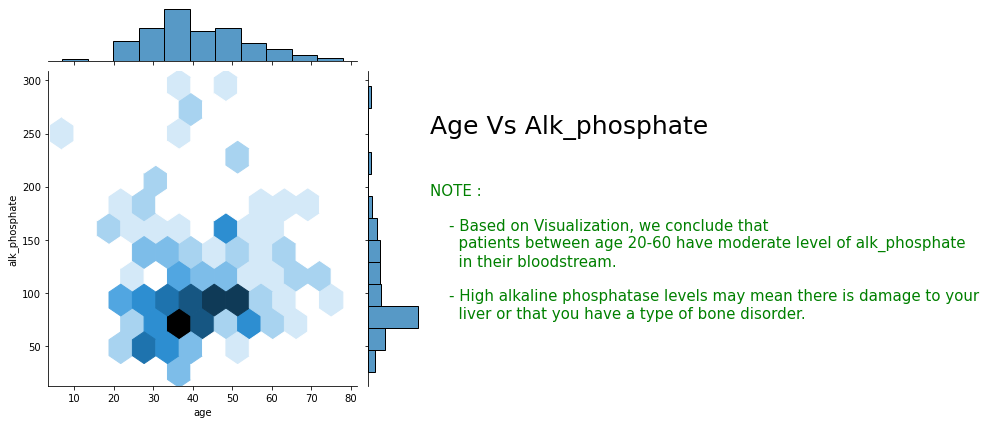

In [64]:
sns.jointplot(x="age", y="alk_phosphate", data=df,kind='hex');
temp = '''
NOTE : 

    - Based on Visualization, we conclude that
      patients between age 20-60 have moderate level of alk_phosphate
      in their bloodstream.
    
    - High alkaline phosphatase levels may mean there is damage to your
      liver or that you have a type of bone disorder.
'''
plt.text(100,60,temp,fontsize=15,color='green');
plt.text(100,250,'Age Vs Alk_phosphate',fontsize=25);

### SGOT
 - SGOT are the enzymes produced by the liver.
 - The SGOT test is a blood test that's part of a liver profile. It measures one of two liver enzymes, called serum glutamic-oxaloacetic transaminase. This enzyme is now usually called AST, which stands for aspartate aminotransferase. An SGOT test (or AST test) evaluates how much of the liver enzyme is in the blood.
 - The normal range of an SGOT test is generally between 8 and 45 units per liter of serum. In general, men may naturally have higher amounts of AST in the blood. A score above 50 for men and 45 for women is high and may indicate damage.

In [65]:
dict(df['sgot'].agg(['mean','median','std','var','kurt']))

{'mean': 87.52903225806452,
 'median': 58.0,
 'std': 92.64078858740547,
 'var': 8582.315710096356,
 'kurt': 12.434632005751894}

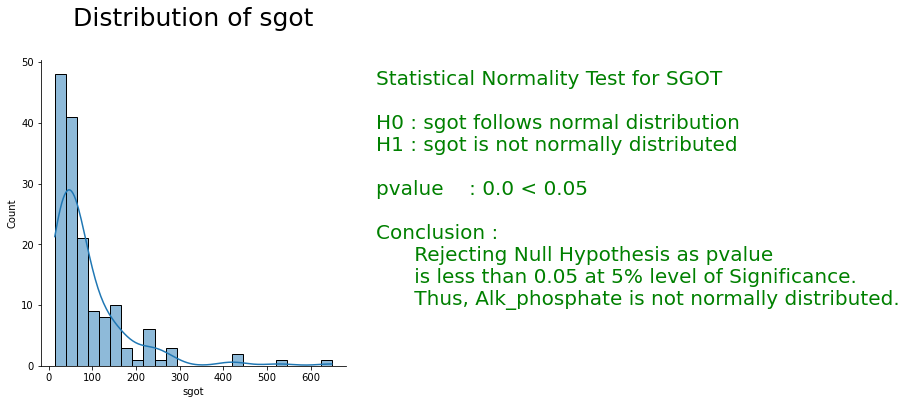

In [66]:
sns.displot(df['sgot'],kde=True);
statistic,pvalue = shapiro(df['sgot'])
temp = f'''Statistical Normality Test for SGOT\n
H0 : sgot follows normal distribution
H1 : sgot is not normally distributed\n
pvalue    : {round(pvalue,4)} < 0.05\n
Conclusion :\n      Rejecting Null Hypothesis as pvalue 
      is less than 0.05 at 5% level of Significance.
      Thus, Alk_phosphate is not normally distributed.'''
plt.text(750,10,temp,fontsize=20,color='green');
plt.title('Distribution of sgot\n',fontsize=25);

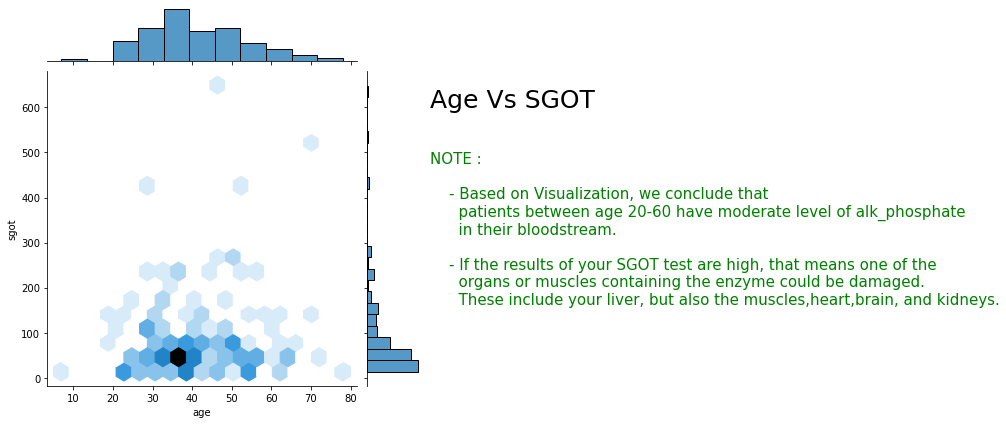

In [67]:
sns.jointplot(x="age", y="sgot", data=df,kind='hex');
temp = '''
NOTE : 

    - Based on Visualization, we conclude that
      patients between age 20-60 have moderate level of alk_phosphate
      in their bloodstream.
    
    - If the results of your SGOT test are high, that means one of the
      organs or muscles containing the enzyme could be damaged.
      These include your liver, but also the muscles,heart,brain, and kidneys.
'''
plt.text(100,125,temp,fontsize=15,color='green');
plt.text(100,600,'Age Vs SGOT',fontsize=25);
plt.tight_layout();

Univariate analysis for age, bilirubin, alk_phosphate, sgot, albumin, protime along with individual class

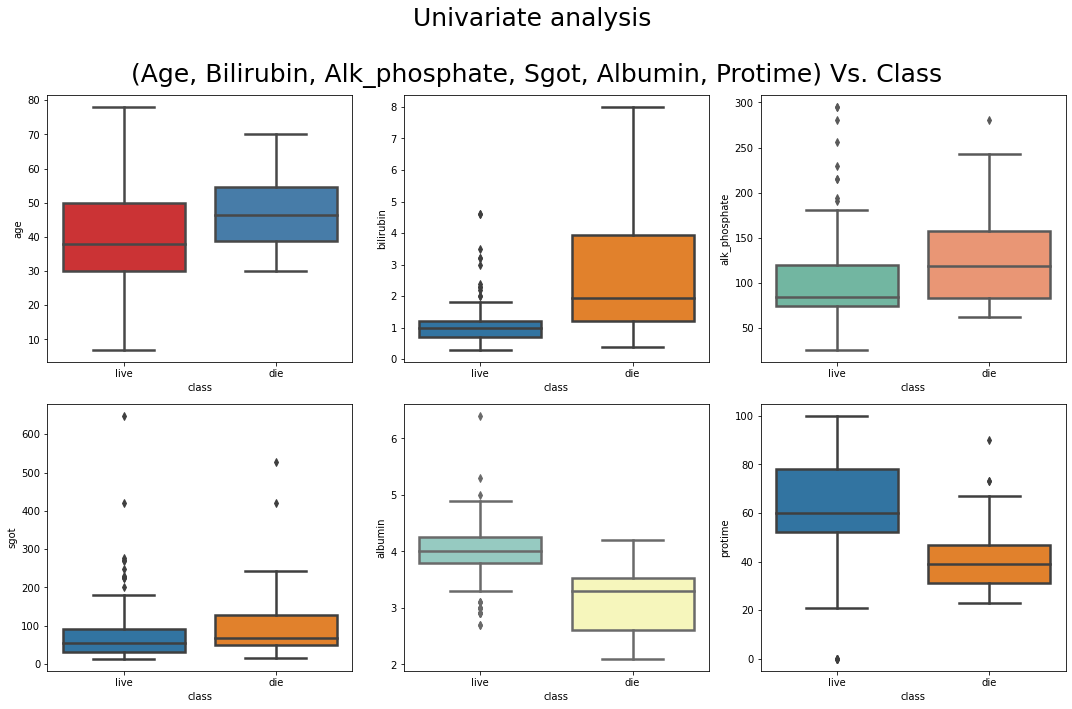

In [68]:
num = df.loc[:,['age','bilirubin','alk_phosphate','sgot','albumin','protime']]

fig,ax = plt.subplots(2,3,figsize=[15,10])
sns.boxplot(data = num,y = 'age',x=df['class'],ax=ax[0,0],linewidth=2.5,palette="Set1")
sns.boxplot(data = num,y = 'bilirubin',x=df['class'],ax=ax[0,1],linewidth=2.5)
sns.boxplot(data = num,y = 'alk_phosphate',x=df['class'],ax=ax[0,2],linewidth=2.5,palette="Set2")
sns.boxplot(data = num,y = 'sgot',x=df['class'],ax=ax[1,0,],linewidth=2.5)
sns.boxplot(data = num,y = 'albumin',x=df['class'],ax=ax[1,1],linewidth=2.5,palette="Set3")
sns.boxplot(data = num,y = 'protime',x=df['class'],ax=ax[1,2],linewidth=2.5)
plt.suptitle('Univariate analysis \n\n(Age, Bilirubin, Alk_phosphate, Sgot, Albumin, Protime) Vs. Class',fontsize=25);
plt.tight_layout();

## Correlation Matrix for Categorical Data ( Spearman )
 - Higher value of spearman rank correlation coefficient indicate high degree of dependency.

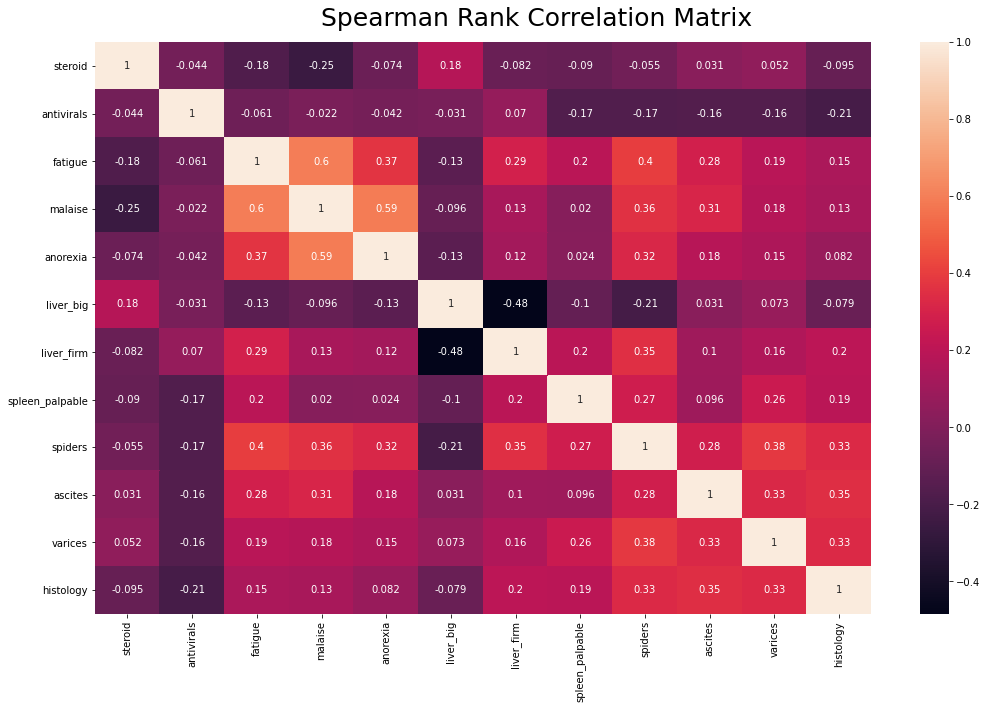

In [69]:
fig = plt.figure(figsize=[15,10])
sns.heatmap(data = df.loc[:,['steroid','antivirals','fatigue','malaise','anorexia','liver_big',
                             'liver_firm','spleen_palpable',
         'spiders','ascites','varices','histology','class']].corr(method='spearman'),annot=True);
plt.suptitle('Spearman Rank Correlation Matrix',fontsize=25);
plt.tight_layout();

## Graphical Representation of Variance - Covarience Matrix

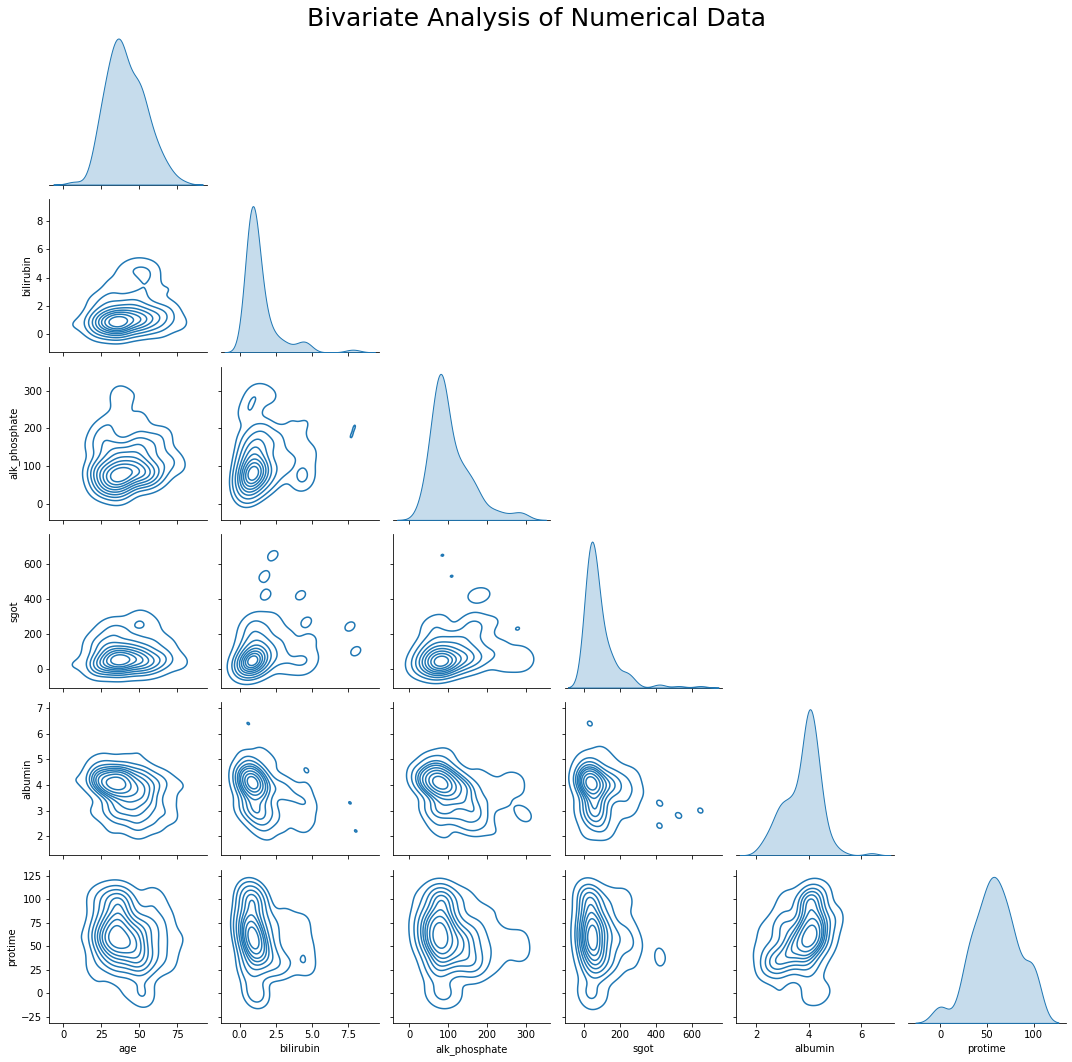

In [70]:
sns.pairplot(numerical_data,corner=True,kind='kde');
plt.suptitle('Bivariate Analysis of Numerical Data',fontsize=25);
plt.tight_layout();

## Correlation Matrix for Numerical Data ( Pearson )

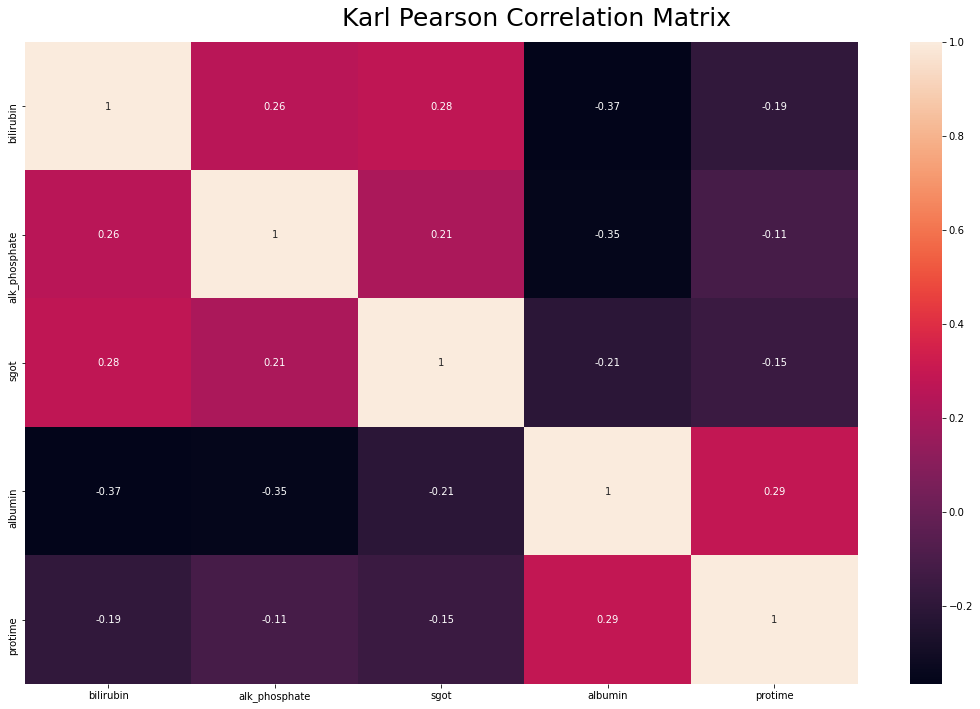

In [71]:
fig = plt.figure(figsize=[15,10])
sns.heatmap(data = df.loc[:,['bilirubin','alk_phosphate','sgot','albumin','protime']].corr(),annot=True);
plt.suptitle('Karl Pearson Correlation Matrix',fontsize=25);
plt.tight_layout();

Testing Significance of Correlation using Pearsonr

In [72]:
for i in numerical_data.columns:
    print(f'Correlation for {i}',end='\n************************************\n')
    
    for j in numerical_data.columns:
        if i != j:
            p = pearsonr(numerical_data[i],numerical_data[j])
            if p[1]>= 0.05:
                print(j,"corr : ",p[0],"\nprob : ",p[1],'\nResult : insignificant\n--------------------------------------')
            else:
                print(j,"corr : ",p[0],"\nprob : ",p[1],'\nResult : significant\n--------------------------------------')
    print("\n")

Correlation for age
************************************
bilirubin corr :  0.12630788809461949 
prob :  0.11733212802916146 
Result : insignificant
--------------------------------------
alk_phosphate corr :  0.052692054272655234 
prob :  0.5149475935422967 
Result : insignificant
--------------------------------------
sgot corr :  0.1044750739815339 
prob :  0.19576251871156602 
Result : insignificant
--------------------------------------
albumin corr :  -0.2817327117545265 
prob :  0.00038323623991948837 
Result : significant
--------------------------------------
protime corr :  -0.14189120206034808 
prob :  0.07821239830963875 
Result : insignificant
--------------------------------------


Correlation for bilirubin
************************************
age corr :  0.12630788809461949 
prob :  0.11733212802916146 
Result : insignificant
--------------------------------------
alk_phosphate corr :  0.2554714659658289 
prob :  0.0013354183116401303 
Result : significant
--------------